# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [31]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [32]:
def x_d(p):
    return 500 - 3.2*p


def x_s(p,t):
    return -100+4.3*p*(1-t)

def x_s_25(p,t):
    return -100+4.3*p*(1-0.25)

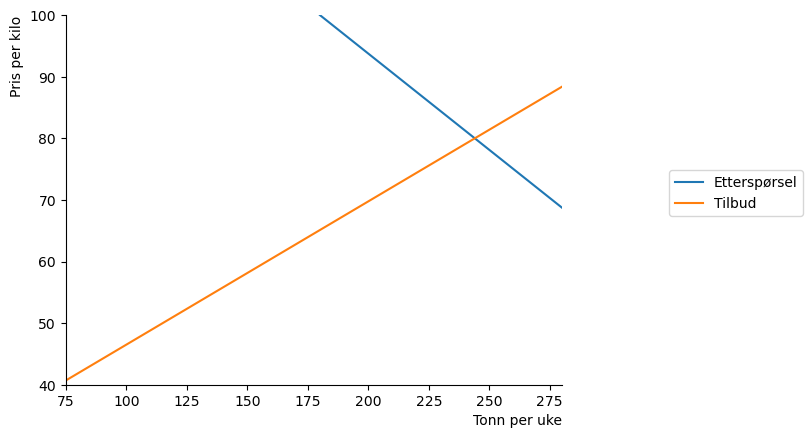

In [94]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()


ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


In [62]:
def x_d(p):
    return 500 - 3.2*p


def x_s(p,t):
    return -100+4.3*p*(1-t)

def x_s_25(p,t):
    return -100+4.3*p*(1-0.25)

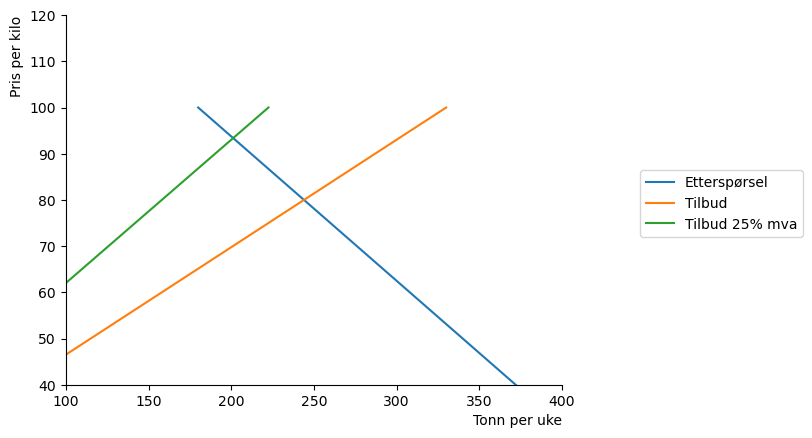

In [95]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(100,400))
                ax.set(ylim=(40,120))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()


ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s_25(p_num, 0),p_num, label= 'Tilbud 25% mva')

#ax.plot(x_d_25(p_num),p_num, label='Etterspørsel 25% mva')

ax.legend(bbox_to_anchor=(1.5,0.6));

#jo høyere prisen blir jo høyere vil den kunne klatre, når prisen er 25% høyere vil den ha desto 
# høyere potensiale til å øke og vil derfor vise en brattere vekstkurve.

In [64]:
# definer symboler i sympy

x,p,t=sp.symbols('x p t', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,t))
eq_cond

Eq(500 - 3.2*p, 4.3*p*(1 - t) - 100)

In [65]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-6000.0/(43.0*t - 75.0)

In [66]:
x_eq=x_s(p_eq[0],t)
x_eq

-25800.0*(1 - t)/(43.0*t - 75.0) - 100

In [67]:
p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

p_eq_fn(t)

-6000.0/(43.0*t - 75.0)

In [68]:
x_eq_fn=sp.lambdify(
    (t), 
    x_eq
)

x_eq_fn(t)

-100 + (25800.0*t - 25800.0)/(43.0*t - 75.0)

In [69]:
x_eq_fn(0)

244.0

In [70]:
x_eq_fn(0.25)

201.16731517509726

In [71]:
kvantummva = round(x_eq_fn(0.25,),2)
kvantummva

201.17

In [72]:
kvantummva = sp.lambdify(
    (t),
    kvantummva
)
kvantummva(t)

201.17

In [73]:
kvantumuavgift = round(x_eq_fn(0,),2)
kvantumuavgift

244.0

In [74]:
kvantumuavgift = sp.lambdify(
    (t),
    kvantumuavgift
)
kvantumuavgift(t)

244.0

In [75]:
p_kons = round(p_eq_fn(0),2)
p_kons

80.0

In [76]:
p_konse = round(p_eq_fn(0.25),2)
p_konse

93.39

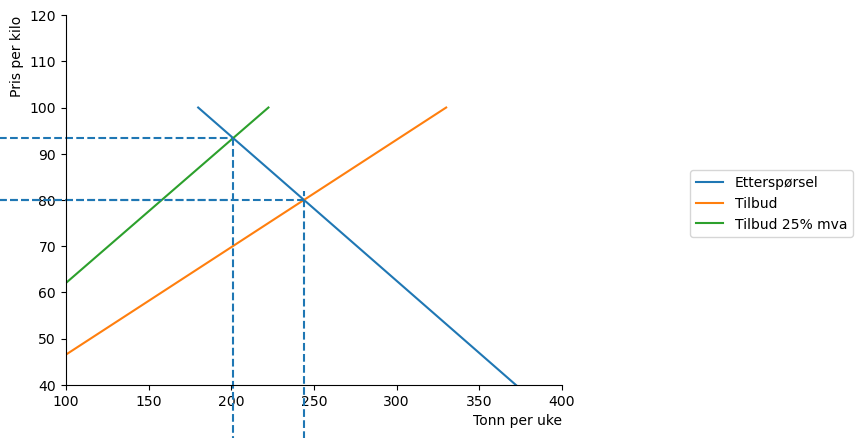

In [96]:
# sett inn linjer som viser likevekten
# clip_on=False for å tegne utenfor plottområdet
ax.vlines(x_eq_fn(0.25),93.39, 0, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(0),0, 82, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0.25),0,201, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0),0,244, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0),0,200, linestyles='dashed', clip_on=False)
# sett inn likevektsverdier i figuren

#ax.annotate(x_opt, xy=(x_opt-4,64), annotation_clip=False)
#ax.annotate(p_kons, xy=(200, p_kons), annotation_clip=False)
#ax.annotate(p_kons-4, xy=(200, p_kons-4), annotation_clip=False)

#ax.annotate(kvantumuavgift, xy=(kvantumuavgift-4), annotation_clip=False)
#ax.annotate(kvantumuavgift, xy=(110, kvantumuavgift+1), annotation_clip=False)
#ax.annotate(kvantummva-4, xy=(200, kvantummva-4), annotation_clip=False)
#ax.annotate(kvantumuavgift-4, xy=(200, kvantumuavgift-4), annotation_clip=False)
ax.legend(bbox_to_anchor=(1.6,0.6))
fig

In [98]:
def avgiftprov(t):
    return t*x_eq_fn(t)
avgiftprov(t)

t*(-100 + (25800.0*t - 25800.0)/(43.0*t - 75.0))

In [99]:
#Hva er fordeler/ulemper av en mva og en stykkprisavgift?
#en ulempe med mva at det potensielt kan dempe salg av visse varer om prisen allerede er høy.
#dette er ikke et like stort problem med varer som ikke allerede har en høy pris, og en vil merke effekten mindre.
#mva på mindre verdisatte, som det også vil være mer salg av, bidrar til inntekt til myndighetene.
#stykkprisavgift er et fast beløp, som potensielt kan være høyere en mva, og kan i ekstreme tilfeller
#føre til mye lavere etterspørsel, og derfor effektiveten av denne avgiften.